# Gun Laws in the US by State: Data Cleaning

In [1]:
# import dependencies
import pandas as pd

In [2]:
# read tSV file (tab separated)
file_path = "Resources/gun_laws_data_and_codebook/37363-0001-Data.tsv"
gun_laws_df = pd.read_csv(file_path, sep='\t')
gun_laws_df.head()

,STATE,YEAR,FELONY,INVCOMMITMENT,INVOUTPATIENT,DANGER,DRUGMISDEMEANOR,ALCTREATMENT,ALCOHOLISM,RELINQUISHMENT,...,EXPARTEDATING,DVROSURRENDER,DVROSURRENDERNOCONDITIONS,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alaska,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,California,1991,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,58


In [3]:
# Getting list of column names 
gun_laws_df.columns.to_list()

['STATE',
 'YEAR',
 'FELONY',
 'INVCOMMITMENT',
 'INVOUTPATIENT',
 'DANGER',
 'DRUGMISDEMEANOR',
 'ALCTREATMENT',
 'ALCOHOLISM',
 'RELINQUISHMENT',
 'VIOLENT',
 'VIOLENTH',
 'VIOLENTPARTIAL',
 'DEALER',
 'DEALERH',
 'RECORDSALL',
 'RECORDSALLH',
 'RECORDSDEALER',
 'RECORDSDEALERH',
 'REPORTALL',
 'REPORTALLH',
 'REPORTDEALER',
 'REPORTDEALERH',
 'PURGE',
 'RESIDENTIAL',
 'THEFT',
 'SECURITY',
 'INSPECTION',
 'AMMLICENSE',
 'AMMRECORDS',
 'PERMIT',
 'PERMITH',
 'FINGERPRINT',
 'TRAINING',
 'PERMITLAW',
 'REGISTRATION',
 'REGISTRATIONH',
 'DEFACTOREG',
 'DEFACTOREGH',
 'AMMPERMIT',
 'AMMRESTRICT',
 'AGE21HANDGUNSALE',
 'AGE18LONGGUNSALE',
 'AGE21LONGGUNSALED',
 'AGE21LONGGUNSALE',
 'AGE21HANDGUNPOSSESS',
 'AGE18LONGGUNPOSSESS',
 'AGE21LONGGUNPOSSESS',
 'LOSTSTOLEN',
 'AMM18',
 'AMM21H',
 'UNIVERSAL',
 'UNIVERSALH',
 'GUNSHOW',
 'GUNSHOWH',
 'UNIVERSALPERMIT',
 'UNIVERSALPERMITH',
 'BACKGROUNDPURGE',
 'AMMBACKGROUND',
 'THREEDAYLIMIT',
 'MENTALHEALTH',
 'STATECHECKS',
 'STATECHECKSH',
 'W

### Creating new categories based on codebook

In [4]:
# defining a function that gets list of columns and name of category then sum columns and drop them, 
# leaving only the column with the sum
def create_catg(new_col, cols_sum_and_drop):
    gun_laws_df[new_col] = gun_laws_df[cols_sum_and_drop].sum(axis=1)
    gun_laws_df.drop(columns=cols_sum_and_drop, inplace=True)

In [5]:
# Category 1: Dealer Regulations
columns_to_sum_and_drop = ['DEALER', 'DEALERH', 'RECORDSDEALER', 'RECORDSDEALERH', 'RECORDSALL', 
                           'RECORDSALLH', 'REPORTDEALER', 'REPORTDEALERH', 'REPORTALL', 'REPORTALLH', 
                           'PURGE', 'RESIDENTIAL', 'THEFT', 'SECURITY', 'INSPECTION', 'LIABILITY', 'JUNKGUN']
create_catg("dealer_regulations", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,FELONY,INVCOMMITMENT,INVOUTPATIENT,DANGER,DRUGMISDEMEANOR,ALCTREATMENT,ALCOHOLISM,RELINQUISHMENT,...,DVROSURRENDER,DVROSURRENDERNOCONDITIONS,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,15,7
1,Alaska,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
2,Arizona,1991,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0
3,Arkansas,1991,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
4,California,1991,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,58,12


In [6]:
# Category 2: Buyer Regulations
columns_to_sum_and_drop = ['WAITING', 'WAITINGH', 'PERMIT', 'PERMITH', 'PERMITLAW', 'FINGERPRINT', 
                           'TRAINING', 'REGISTRATION', 'REGISTRATIONH', 'DEFACTOREG', 'DEFACTOREGH', 
                           'AGE21HANDGUNSALE', 'AGE18LONGGUNSALE', 'AGE21LONGGUNSALED', 'AGE21LONGGUNSALE', 
                           'LOSTSTOLEN', 'ONEPERMONTH']
create_catg("buyer_regulations", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,FELONY,INVCOMMITMENT,INVOUTPATIENT,DANGER,DRUGMISDEMEANOR,ALCTREATMENT,ALCOHOLISM,RELINQUISHMENT,...,DVROSURRENDERNOCONDITIONS,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,15,7,1
1,Alaska,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
2,Arizona,1991,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,12,0,0
3,Arkansas,1991,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,15,0,0
4,California,1991,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,58,12,5


In [7]:
# Category 3: Prohibitions for high-risk gun possession
columns_to_sum_and_drop = ['FELONY', 'VIOLENT', 'VIOLENTH', 'VIOLENTPARTIAL', 'INVCOMMITMENT', 
                           'INVOUTPATIENT', 'DANGER', 'DRUGMISDEMEANOR', 'ALCTREATMENT', 
                           'ALCOHOLISM', 'RELINQUISHMENT']
create_catg("gun_posses_prohibitions", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,AMMLICENSE,AMMRECORDS,AMMPERMIT,AMMRESTRICT,AGE21HANDGUNPOSSESS,AGE18LONGGUNPOSSESS,AGE21LONGGUNPOSSESS,AMM18,...,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions
0,Alabama,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,7,1,1
1,Alaska,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,1
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,3
3,Arkansas,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,3
4,California,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,58,12,5,7


In [8]:
# Category 4: Background checks
columns_to_sum_and_drop = ['UNIVERSAL', 'UNIVERSALH', 'GUNSHOW', 'GUNSHOWH', 'UNIVERSALPERMIT', 
                           'UNIVERSALPERMITH', 'BACKGROUNDPURGE', 'THREEDAYLIMIT', 'MENTALHEALTH', 
                           'STATECHECKS', 'STATECHECKSH']
create_catg("background_checks", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,AMMLICENSE,AMMRECORDS,AMMPERMIT,AMMRESTRICT,AGE21HANDGUNPOSSESS,AGE18LONGGUNPOSSESS,AGE21LONGGUNPOSSESS,AMM18,...,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks
0,Alabama,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,7,1,1,0
1,Alaska,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,1,0
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,3,0
3,Arkansas,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,0,0,3,0
4,California,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,58,12,5,7,11


In [9]:
# Category 5: Ammunition regulations
columns_to_sum_and_drop = ['AMMLICENSE', 'AMMRECORDS', 'AMMPERMIT', 'AMMRESTRICT', 
                           'AMM18', 'AMM21H', 'AMMBACKGROUND']
create_catg("ammunition_regulations", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,AGE21HANDGUNPOSSESS,AGE18LONGGUNPOSSESS,AGE21LONGGUNPOSSESS,ASSAULT,ONEFEATURE,ASSAULTLIST,ASSAULTREGISTER,ASSAULTTRANSFER,...,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations
0,Alabama,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,15,7,1,1,0,0
1,Alaska,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,1,0,0
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,3,0,0
3,Arkansas,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,15,0,0,3,0,0
4,California,1991,0,0,0,1,0,1,1,1,...,0,0,0,0,58,12,5,7,11,0


In [10]:
# Category 6: Possession regulations
columns_to_sum_and_drop = ['AGE21HANDGUNPOSSESS', 'AGE18LONGGUNPOSSESS', 'AGE21LONGGUNPOSSESS', 
                           'GVRO', 'GVROLAWENFORCEMENT', 'COLLEGE', 'COLLEGECONCEALED', 'ELEMENTARY', 
                           'OPENCARRYH', 'OPENCARRYL', 'OPENCARRYPERMITH', 'OPENCARRYPERMITL']
create_catg("possession_regulations", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,ASSAULT,ONEFEATURE,ASSAULTLIST,ASSAULTREGISTER,ASSAULTTRANSFER,MAGAZINE,TENROUNDLIMIT,MAGAZINEPREOWNED,...,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations
0,Alabama,1991,0,0,0,0,0,0,0,0,...,0,0,0,15,7,1,1,0,0,0
1,Alaska,1991,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,1,0,0,1
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,0,12,0,0,3,0,0,1
3,Arkansas,1991,0,0,0,0,0,0,0,0,...,0,0,0,15,0,0,3,0,0,1
4,California,1991,1,0,1,1,1,0,0,0,...,0,0,0,58,12,5,7,11,0,5


In [11]:
# Category 7: Concealed carry permitting
columns_to_sum_and_drop = ['PERMITCONCEALED', 'MAYISSUE', 'SHOWING', 'CCREVOKE', 'CCBACKGROUND', 
                           'CCBACKGROUNDNICS', 'CCRENEWBACKGROUND']
create_catg("concealed_carry_permits", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,ASSAULT,ONEFEATURE,ASSAULTLIST,ASSAULTREGISTER,ASSAULTTRANSFER,MAGAZINE,TENROUNDLIMIT,MAGAZINEPREOWNED,...,DVROREMOVAL,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits
0,Alabama,1991,0,0,0,0,0,0,0,0,...,0,0,15,7,1,1,0,0,0,3
1,Alaska,1991,0,0,0,0,0,0,0,0,...,0,0,10,0,0,1,0,0,1,6
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,12,0,0,3,0,0,1,6
3,Arkansas,1991,0,0,0,0,0,0,0,0,...,0,0,15,0,0,3,0,0,1,6
4,California,1991,1,0,1,1,1,0,0,0,...,0,0,58,12,5,7,11,0,5,5


In [12]:
# Category 8: Assault weapons and large-capacity magazines
columns_to_sum_and_drop = ['ASSAULT', 'ONEFEATURE', 'ASSAULTLIST', 'ASSAULTREGISTER', 
                           'ASSAULTTRANSFER', 'MAGAZINE', 'TENROUNDLIMIT', 'MAGAZINEPREOWNED']
create_catg("assault_weapons_bans", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,TRAFFICKINGBACKGROUND,TRAFFICKINGPROHIBITED,TRAFFICKINGPROHIBITEDH,STRAWPURCHASE,STRAWPURCHASEH,MICROSTAMP,NOSYG,PERSONALIZED,...,STALKING,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,15,7,1,1,0,0,0,3,0
1,Alaska,1991,0,0,0,0,0,0,1,0,...,0,10,0,0,1,0,0,1,6,0
2,Arizona,1991,0,0,0,0,0,0,1,0,...,0,12,0,0,3,0,0,1,6,0
3,Arkansas,1991,0,0,0,0,0,0,1,0,...,0,15,0,0,3,0,0,1,6,0
4,California,1991,0,0,0,0,0,0,1,0,...,0,58,12,5,7,11,0,5,5,4


In [13]:
# Category 9: Child access prevention
columns_to_sum_and_drop = ['LOCKD', 'LOCKP', 'LOCKSTANDARDS', 'LOCKED', 'CAPLIABILITY', 
                           'CAPACCESS', 'CAPUSES', 'CAPUNLOADED', 'CAP18', 'CAP16', 'CAP14']
create_catg("child_access_prevention", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,TRAFFICKINGBACKGROUND,TRAFFICKINGPROHIBITED,TRAFFICKINGPROHIBITEDH,STRAWPURCHASE,STRAWPURCHASEH,MICROSTAMP,NOSYG,PERSONALIZED,...,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention
0,Alabama,1991,0,0,0,0,0,0,1,0,...,15,7,1,1,0,0,0,3,0,0
1,Alaska,1991,0,0,0,0,0,0,1,0,...,10,0,0,1,0,0,1,6,0,0
2,Arizona,1991,0,0,0,0,0,0,1,0,...,12,0,0,3,0,0,1,6,0,0
3,Arkansas,1991,0,0,0,0,0,0,1,0,...,15,0,0,3,0,0,1,6,0,0
4,California,1991,0,0,0,0,0,0,1,0,...,58,12,5,7,11,0,5,5,4,4


In [14]:
# Category 10: Gun trafficking
columns_to_sum_and_drop = ['TRAFFICKINGBACKGROUND', 'TRAFFICKINGPROHIBITED', 'TRAFFICKINGPROHIBITEDH', 
                           'STRAWPURCHASE', 'STRAWPURCHASEH', 'MICROSTAMP', 'PERSONALIZED']
create_catg("gun_trafficking", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,NOSYG,IMMUNITY,PREEMPTION,PREEMPTIONNARROW,PREEMPTIONBROAD,MCDV,MCDVDATING,MCDVSURRENDER,...,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention,gun_trafficking
0,Alabama,1991,1,1,0,0,1,0,0,0,...,7,1,1,0,0,0,3,0,0,0
1,Alaska,1991,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,6,0,0,0
2,Arizona,1991,1,1,0,0,0,0,0,0,...,0,0,3,0,0,1,6,0,0,0
3,Arkansas,1991,1,1,1,1,1,0,0,0,...,0,0,3,0,0,1,6,0,0,0
4,California,1991,1,0,0,1,1,1,1,0,...,12,5,7,11,0,5,5,4,4,0


In [15]:
# Category 12: No or Narrow Preemption Laws
columns_to_sum_and_drop = ['PREEMPTION', 'PREEMPTIONNARROW', 'PREEMPTIONBROAD']
create_catg("no_preemption", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,NOSYG,IMMUNITY,MCDV,MCDVDATING,MCDVSURRENDER,MCDVSURRENDERNOCONDITIONS,MCDVSURRENDERDATING,MCDVREMOVALALLOWED,...,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention,gun_trafficking,no_preemption
0,Alabama,1991,1,1,0,0,0,0,0,0,...,1,1,0,0,0,3,0,0,0,1
1,Alaska,1991,1,1,0,0,0,0,0,0,...,0,1,0,0,1,6,0,0,0,0
2,Arizona,1991,1,1,0,0,0,0,0,0,...,0,3,0,0,1,6,0,0,0,0
3,Arkansas,1991,1,1,0,0,0,0,0,0,...,0,3,0,0,1,6,0,0,0,3
4,California,1991,1,0,1,1,0,0,0,0,...,5,7,11,0,5,5,4,4,0,2


In [16]:
# Category 14: Domestic violence
columns_to_sum_and_drop = ['MCDV', 'MCDVDATING', 'MCDVSURRENDER', 'MCDVSURRENDERNOCONDITIONS', 
                           'MCDVSURRENDERDATING', 'MCDVREMOVALALLOWED', 'MCDVREMOVALREQUIRED', 
                           'INCIDENTREMOVAL', 'INCIDENTALL', 'DVRO', 'DVRODATING', 'EXPARTE', 'EXPARTEDATING', 
                           'DVROSURRENDER', 'DVROSURRENDERNOCONDITIONS', 'DVROSURRENDERDATING', 'EXPARTESURRENDER', 
                           'EXPARTESURRENDERNOCONDITIONS', 'EXPARTESURRENDERDATING', 'DVROREMOVAL', 'STALKING']
create_catg("domestic_violence", columns_to_sum_and_drop)
gun_laws_df.head()

,STATE,YEAR,NOSYG,IMMUNITY,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention,gun_trafficking,no_preemption,domestic_violence
0,Alabama,1991,1,1,15,7,1,1,0,0,0,3,0,0,0,1,0
1,Alaska,1991,1,1,10,0,0,1,0,0,1,6,0,0,0,0,0
2,Arizona,1991,1,1,12,0,0,3,0,0,1,6,0,0,0,0,0
3,Arkansas,1991,1,1,15,0,0,3,0,0,1,6,0,0,0,3,0
4,California,1991,1,0,58,12,5,7,11,0,5,5,4,4,0,2,2


In [17]:
# Category 11: nosyg - Use of deadly force is not allowed to be a first resort in public
# Category 13: Immunity - No law provides blanket immunity to gun manufacturers 
                        # or prohibits state or local lawsuits against gun manufacturers

gun_laws_df = gun_laws_df.rename(columns={"NOSYG": "no_stand_your_ground", 
                                          "IMMUNITY": "immunity"})
gun_laws_df.head()

,STATE,YEAR,no_stand_your_ground,immunity,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention,gun_trafficking,no_preemption,domestic_violence
0,Alabama,1991,1,1,15,7,1,1,0,0,0,3,0,0,0,1,0
1,Alaska,1991,1,1,10,0,0,1,0,0,1,6,0,0,0,0,0
2,Arizona,1991,1,1,12,0,0,3,0,0,1,6,0,0,0,0,0
3,Arkansas,1991,1,1,15,0,0,3,0,0,1,6,0,0,0,3,0
4,California,1991,1,0,58,12,5,7,11,0,5,5,4,4,0,2,2


In [18]:
# Define the desired column order
column_order = ['STATE', 'YEAR', 'LAWTOTAL', 'dealer_regulations', 'buyer_regulations',
                'gun_posses_prohibitions', 'background_checks', 'ammunition_regulations',
                'possession_regulations', 'concealed_carry_permits', 'assault_weapons_bans',
                'child_access_prevention', 'gun_trafficking', 'domestic_violence',
                'no_preemption', 'no_stand_your_ground', 'immunity']
# Reorder the columns in the DataFrame
gun_laws_df = gun_laws_df.reindex(columns=column_order)
gun_laws_df.head()

,STATE,YEAR,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention,gun_trafficking,domestic_violence,no_preemption,no_stand_your_ground,immunity
0,Alabama,1991,15,7,1,1,0,0,0,3,0,0,0,0,1,1,1
1,Alaska,1991,10,0,0,1,0,0,1,6,0,0,0,0,0,1,1
2,Arizona,1991,12,0,0,3,0,0,1,6,0,0,0,0,0,1,1
3,Arkansas,1991,15,0,0,3,0,0,1,6,0,0,0,0,3,1,1
4,California,1991,58,12,5,7,11,0,5,5,4,4,0,2,2,1,0


In [19]:
# Verifyng that the LAWTOTAL columnn that was provided in the dataset sum up all of the 14 categories
gun_laws_df['total_laws'] = gun_laws_df[['dealer_regulations', 'buyer_regulations',
                'gun_posses_prohibitions', 'background_checks', 'ammunition_regulations',
                'possession_regulations', 'concealed_carry_permits', 'assault_weapons_bans',
                'child_access_prevention', 'gun_trafficking', 'domestic_violence',
                'no_preemption', 'no_stand_your_ground', 'immunity']].sum(axis=1)
gun_laws_df['verify'] = gun_laws_df['total_laws'] == gun_laws_df['LAWTOTAL']
gun_laws_df['verify'].value_counts()

True     1449
False       1
Name: verify, dtype: int64

In [22]:
# checking which row is off.
gun_laws_df.loc[gun_laws_df['verify'] == False, :]

,STATE,YEAR,LAWTOTAL,dealer_regulations,buyer_regulations,gun_posses_prohibitions,background_checks,ammunition_regulations,possession_regulations,concealed_carry_permits,assault_weapons_bans,child_access_prevention,gun_trafficking,domestic_violence,no_preemption,no_stand_your_ground,immunity,total_laws,verify
1444,Vermont,2019,20,1,4,0,7,0,1,0,1,0,0,3,0,1,1,19,False


In [23]:
# Keeping the total we created, instead of original
gun_laws_df.drop(columns=['LAWTOTAL', 'verify'], inplace=True)
gun_laws_df.shape

(1450, 17)

In [24]:
gun_laws_df['STATE'].value_counts()
''' We have 29 records per each of the 50 states. No other territories included (no Washington DC)'''

South Carolina    29
Washington        29
Iowa              29
Nevada            29
Utah              29
Colorado          29
Alaska            29
Georgia           29
Maine             29
Wisconsin         29
Connecticut       29
New Jersey        29
Illinois          29
Texas             29
Kansas            29
Wyoming           29
New Mexico        29
Minnesota         29
West Virginia     29
Delaware          29
Oklahoma          29
North Carolina    29
Massachusetts     29
Michigan          29
Alabama           29
Montana           29
Pennsylvania      29
Arkansas          29
Louisiana         29
North Dakota      29
Virginia          29
Arizona           29
California        29
Indiana           29
Mississippi       29
Hawaii            29
Missouri          29
Nebraska          29
New Hampshire     29
Tennessee         29
New York          29
South Dakota      29
Vermont           29
Kentucky          29
Rhode Island      29
Florida           29
Oregon            29
Ohio         

In [79]:
# exporting the cleaned data to csv
gun_laws_df.to_csv("Resources/gun_laws_1991to2019_cleaned.csv", encoding="utf-8", index=False, header=True)

## Testing the ARIMA forcasting approach on this dataset

In [26]:
# assessing the stationary of the data for forcasting purpose
from statsmodels.tsa.stattools import adfuller
"""The ADF test is a statistical test commonly used to assess the stationarity of a time series. 
It tests the null hypothesis that the data has a unit root (i.e., non-stationary). 
If the p-value obtained from the ADF test is below a certain significance level (e.g., 0.05), 
you can reject the null hypothesis and conclude that the data is stationary."""

# grouping data by year
grouped_data = gun_laws_df.groupby('YEAR')['total_laws'].sum()

result = adfuller(grouped_data)
test_statistic = result[0]
p_value = result[1]

print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

ADF Test Statistic: -1.923995748401278
p-value: 0.32085830560384987


In [ ]:
"""
The result above indicates that the data is not stationary.

Stationarity implies that the statistical properties of the data, 
such as mean and variance, remain consistent over time. 
Forecasting models often assume stationarity, so if your data exhibits non-stationarity, 
additional steps may be required for accurate forecasting.

Still we can use the ARIMA model beacuse it is designed to handle non-stationary time series data 
by incorporating differencing. 
"""

In [30]:
# Compute first-order difference and remove NaN values
differenced_data = grouped_data.diff().dropna()  

# running the test on the transformed data
result = adfuller(differenced_data)
test_statistic = result[0]
p_value = result[1]

print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

ADF Test Statistic: -1.5921300557582
p-value: 0.4875456417858147


In [31]:
# Compute second-order difference and remove NaN values
differenced_data2 = grouped_data.diff(periods=2).dropna()  

# running the test on the transformed data
result = adfuller(differenced_data2)
test_statistic = result[0]
p_value = result[1]

print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

ADF Test Statistic: -2.768624810463579
p-value: 0.06289713512371546


In [32]:
# Compute third-order difference and remove NaN values
differenced_data3 = grouped_data.diff(periods=3).dropna()  

# running the test on the transformed data
result = adfuller(differenced_data3)
test_statistic = result[0]
p_value = result[1]

print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

ADF Test Statistic: -3.1562124925796793
p-value: 0.022663345480394597


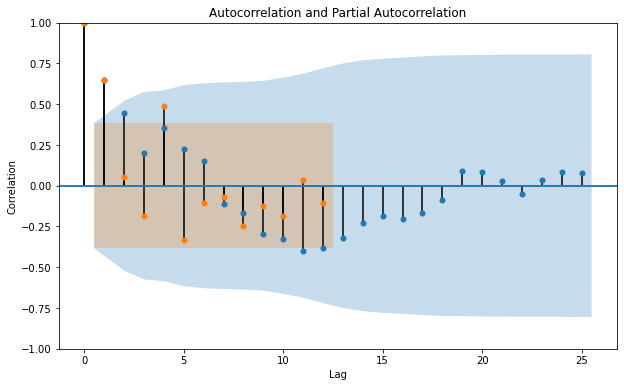

In [45]:
"""Third order differencing is stationary and can be used in forcasting
 the next step is to identify the appropriate order for the ARIMA model. 
 To determine the order, need to analyze the autocorrelation and 
 partial autocorrelation plots of the differenced data. """
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF on the same figure
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(differenced_data3, lags=min(30, len(differenced_data3)-1), ax=ax)
plot_pacf(differenced_data3, lags=min(12, len(differenced_data3)//2), method='ywm', ax=ax)

# Customize the plot
ax.set_title('Autocorrelation and Partial Autocorrelation')
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')

# Display the plot
plt.show()

In [ ]:
"""
ACF measures the correlation between the time series and its lagged values.
In the ACF plot, each bar represents the correlation coefficient between the time series and 
the lagged values at different lags.
Significance: The significance of a correlation coefficient is determined by comparing it to 
the confidence interval (depicted as the blue shaded region). 
If a bar extends beyond the confidence interval, it suggests a significant correlation.

Interpretation:
If there is a significant positive autocorrelation at lag k, 
it indicates that the current value of the time series is positively correlated with the value at lag k. 
This suggests a potential AR component in the ARIMA model.
If there is a significant negative autocorrelation at lag k, 
it indicates that the current value of the time series is negatively correlated with the value at lag k. 
This suggests a potential MA component in the ARIMA model.
If the autocorrelation values rapidly decay to zero, 
it suggests that the time series may not require differencing (i.e., it is already stationary).

Partial Autocorrelation Function (PACF) Plot:

PACF measures the correlation between the time series and its lagged values, while removing the influence of shorter lags.
In the PACF plot, each bar represents the correlation coefficient between the time series and 
the lagged values at different lags, after removing the effects of shorter lags.

Significance: Similar to the ACF plot, the significance of a correlation coefficient is determined 
by comparing it to the confidence interval (orange shaded area).
Interpretation:
If there is a significant positive partial autocorrelation at lag k, 
it suggests a direct relationship between the current value and the value at lag k, 
after removing the influence of shorter lags. This indicates a potential AR component in the ARIMA model.
If there is a significant negative partial autocorrelation at lag k, 
it suggests an inverse relationship between the current value and the value at lag k, 
after removing the influence of shorter lags. This indicates a potential MA component in the ARIMA model.
If the partial autocorrelation values rapidly decay to zero, 
it suggests that the time series may not require differencing (i.e., it is already stationary).

Overall, the ACF and PACF plots help identify the presence of autoregressive (AR) 
and moving average (MA) components in the time series. 
The patterns and significant lags observed in the plots 
can guide the selection of appropriate ARIMA model parameters (p, d, q) for forecasting or further analysis.
"""

### Running the ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the differenced data into training and test sets
train_data = differenced_data3.iloc[:N]
test_data = differenced_data3.iloc[N:]

# Define the ARIMA model with the suggested parameters
model = ARIMA(train_data, order=(5, 3, 0))

# Fit the ARIMA model
model_fit = model.fit()

# Generate predictions on the test data
predictions_diff = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Reverse the



In [55]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the size of the training set and test set
train_size = int(len(differenced_data3) * 0.7)
test_size = len(differenced_data3) - train_size

# Initialize lists to store the predictions and actual values
predictions = []
actual_values = []

# Perform the rolling window validation
for i in range(test_size):
    train_data = differenced_data3[:train_size + i]
    test_data = differenced_data3[train_size + i:train_size + i + 1]  # Forecast one step ahead

    # Define the order of the ARIMA model
    model = ARIMA(train_data, order=(5, 3, 0))

    # Fit the ARIMA model
    model_fit = model.fit()

    # Make the forecast
    forecast = model_fit.forecast(steps=1)

    # compare prediction to actual value
    prediction = forecast.iloc[0]
    actual_value = test_data.iloc[0]
    print(f'Prediction: {prediction}; Actual value: {actual_value}')
    
    
    # Append the predicted value and actual value to the respective lists
    predictions.append(forecast.iloc[0])
    actual_values.append(test_data.iloc[0])

# Calculate the mean squared error
mse = mean_squared_error(actual_values, predictions)
print("Mean Squared Error:", mse)


Prediction: 22.492560889560217; Actual value: 5.0
Prediction: -30.893783512122255; Actual value: 42.0
Prediction: 88.5935630704529; Actual value: 76.0
Prediction: 127.88413706274093; Actual value: 95.0
Prediction: 87.71766391946316; Actual value: 44.0
Prediction: 24.36020804560974; Actual value: 35.0
Prediction: 32.3802404894805; Actual value: 70.0
Prediction: 126.50771939718729; Actual value: 101.0
Mean Squared Error: 1368.7233785300664


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = mean_squared_error(actual_values, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(actual_values, predictions)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 36.9962616831764
Mean Absolute Error (MAE): 31.668622414554566


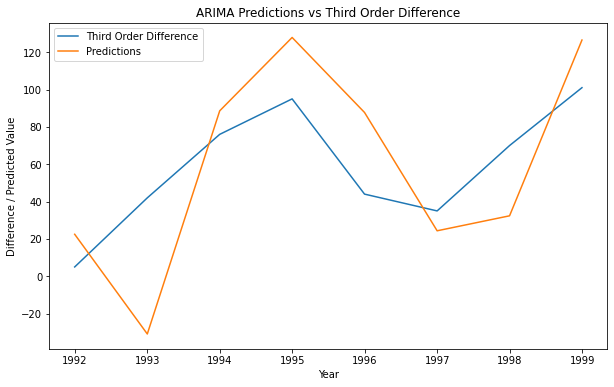

In [59]:
# Create time index for the predictions and third-order differenced data
time_index = pd.date_range(start='1991', periods=len(predictions), freq='Y')

# Plot the third-order differenced data and predictions
plt.figure(figsize=(10, 6))
plt.plot(time_index, differenced_data3[-len(predictions):], label='Third Order Difference')
plt.plot(time_index, predictions, label='Predictions')
plt.xlabel('Year')
plt.ylabel('Difference / Predicted Value')
plt.title('ARIMA Predictions vs Third Order Difference')
plt.legend()
plt.show()


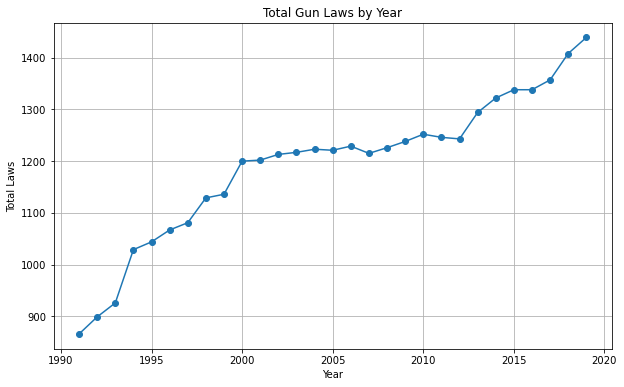

In [60]:
# plotting the original data
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.plot(grouped_data.index, grouped_data.values, marker='o')

# Set the plot title and labels
plt.title('Total Gun Laws by Year')
plt.xlabel('Year')
plt.ylabel('Total Laws')

# Optionally, add gridlines
plt.grid(True)

# Show the plot
plt.show()

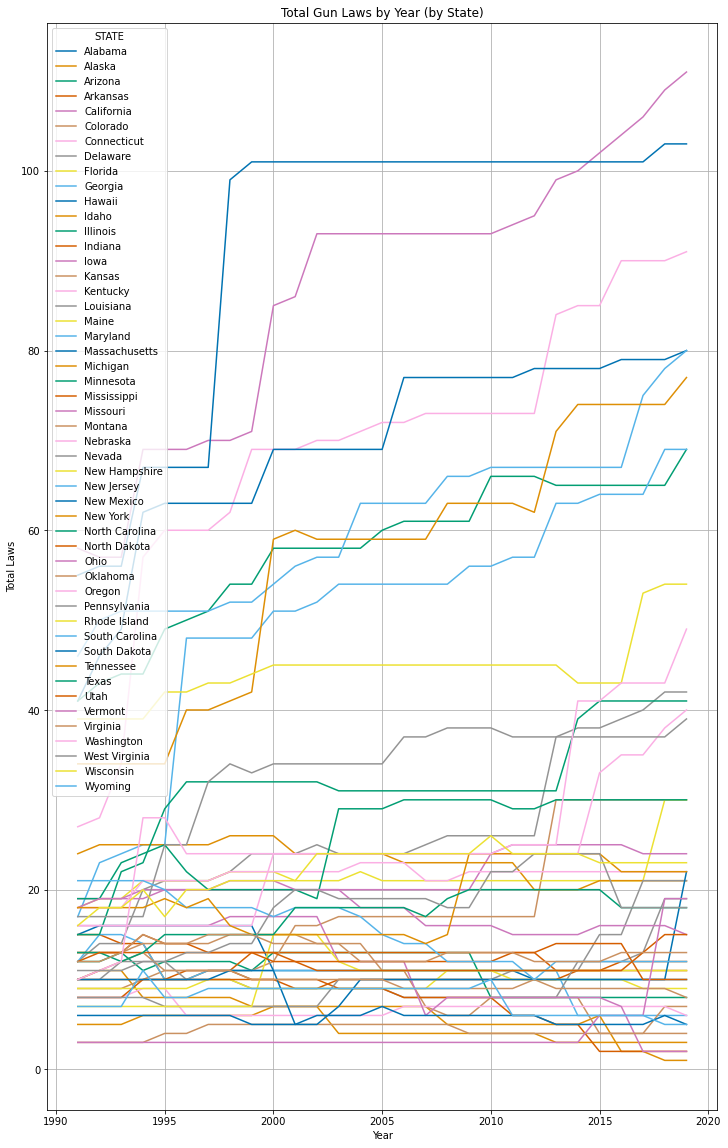

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the gun_laws_df DataFrame

# Create the plot
plt.figure(figsize=(12, 20))  # Optional: Adjust the figure size

# Use Seaborn's lineplot to create multiple lines
sns.lineplot(data=gun_laws_df, x='YEAR', y='total_laws', hue='STATE', palette='colorblind')

# Set the plot title and labels
plt.title('Total Gun Laws by Year (by State)')
plt.xlabel('Year')
plt.ylabel('Total Laws')

# Optionally, add gridlines
plt.grid(True)

# Show the plot
plt.show()


In [77]:
import plotly.express as px

# Assuming you have already loaded your data into the gun_laws_df DataFrame

# Use plotly express to create the interactive plot
fig = px.line(gun_laws_df, x='YEAR', y='total_laws', color='STATE', title='Total Gun Laws by Year (by State)')

# Add tooltips to each line
fig.update_traces(hovertemplate='State: ')

# Set the x-axis and y-axis labels
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Total Laws')

# Increase the figure size
fig.update_layout(width=1000, height=1200)

# Show the plot
fig.show()